In [2]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('../data/CollegeRookieStatLog.csv')
#df = pd.read_csv('CollegeRookieStatLog2.csv')
df.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.2,0.7,1.0,3.2,-5.93,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,1.2,1.9,3.3,14.6,0.74,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.3,0.9,2.4,2.9,-7.38,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.2,2.9,1.4,5.2,-7.20,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9


In [3]:
dfend = pd.read_csv('../data/2019DraftClass.csv')
dfend.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
0,Bryce Aiken,Harvard,58,34,29.4,5.0,12.4,0.406,2.9,6.1,...,0.4,2.1,2.4,2.8,0.8,0.0,2.8,1.9,16.8,-1.09
1,Nickeil Alexander-Walker,Virginia Tech,67,67,29.9,4.7,10.1,0.464,3.0,5.6,...,0.6,3.4,4.0,2.7,1.4,0.5,2.2,1.9,13.5,7.25
2,Al-Wajid Aminu,North Florida,34,26,26.0,3.6,6.7,0.542,3.4,5.9,...,2.6,3.8,6.5,0.7,0.4,1.1,2.1,3.6,9.1,-1.65
3,Desmond Bane,TCU,109,82,28.7,4.2,8.2,0.516,2.8,4.8,...,0.8,3.4,4.2,1.9,0.8,0.3,1.3,2.2,11.5,10.08
4,RJ Barrett,Duke,38,38,35.3,8.4,18.5,0.454,6.5,12.2,...,1.6,6.0,7.6,4.3,0.9,0.4,3.2,1.8,22.6,11.97


In [4]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
for col in cols_at_end:
    dfend[col] = 0
print(len(df))
print(len(dfend))
df1 = df.append(dfend, ignore_index = True)
df1.tail()

866
117


,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
978,Kris Wilkes,UCLA,66.0,65.0,30.8,5.5,12.6,0.436,3.6,7.1,...,0.5,1.6,2.3,15.5,6.82,0.0,0.0,0.0,0.0,0.0
979,Emmitt Williams,LSU,34.0,8.0,19.7,2.6,4.3,0.614,2.6,4.1,...,0.6,1.1,1.9,7.0,9.15,0.0,0.0,0.0,0.0,0.0
980,Grant Williams,Tennessee,104.0,101.0,28.9,5.3,10.2,0.516,5.0,9.2,...,1.5,2.1,3.2,15.7,10.15,0.0,0.0,0.0,0.0,0.0
981,Zion Williamson,Duke,33.0,33.0,30.0,9.0,13.2,0.680,8.2,11.0,...,1.8,2.4,2.1,22.6,11.97,0.0,0.0,0.0,0.0,0.0
982,Kenny Wooten,Oregon,70.0,38.0,21.8,2.6,4.1,0.634,2.6,4.1,...,2.4,1.1,2.6,6.4,5.49,0.0,0.0,0.0,0.0,0.0


In [7]:
df2=pd.read_csv('../data/CombinedDraft.csv')
df2=df2.drop(['Unnamed: 0'], axis=1)
df2.head()

,Name,Pos,Pk,Tm
0,Gilbert Arenas,PG,31,GSW
1,Brandon Armstrong,SG,23,HOU
2,Shane Battier,SF,6,MEM
3,Jamison Brewer,SG,41,IND
4,Damone Brown,SF,37,PHI


In [8]:
df3 = df2.merge(df1, left_on='Name', right_on='Name')

In [9]:
df3.head()

,Name,Pos,Pk,Tm,School,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Gilbert Arenas,PG,31,GSW,Arizona,70.0,33.0,30.5,5.6,12.1,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9
1,Brandon Armstrong,SG,23,HOU,Pepperdine,65.0,30.0,30.4,6.6,15.1,...,0.2,1.9,2.6,18.1,2.56,0.5,0.2,0.2,0.0,1.8
2,Shane Battier,SF,6,MEM,Duke,146.0,39.0,31.4,4.5,8.9,...,1.7,1.2,1.6,13.6,10.08,5.4,2.8,1.6,1.0,14.4
3,Jamison Brewer,SG,41,IND,Auburn,58.0,33.0,23.2,2.1,4.5,...,0.1,2.2,1.3,5.7,7.67,0.6,0.7,0.2,0.0,0.3
4,Damone Brown,SF,37,PHI,Syracuse,113.0,34.0,29.2,4.3,8.7,...,0.8,1.6,2.4,10.9,6.91,0.2,0.1,0.1,0.1,1.4


In [10]:
df3.tail()

,Name,Pos,Pk,Tm,School,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
579,Jaylen Hands,PG,54,PHI,UCLA,64.0,48.0,28.3,4.1,9.9,...,0.2,2.5,1.4,12.1,6.82,0.0,0.0,0.0,0.0,0.0
580,Jaylen Hoard,SF,56,LAC,Wake Forest,31.0,30.0,30.2,4.9,10.7,...,0.6,2.5,2.2,13.1,8.47,0.0,0.0,0.0,0.0,0.0
581,Miye Oni,SG,57,NOP,Yale,87.0,82.0,31.7,5.2,12.1,...,1.0,2.6,2.8,15.0,-2.08,0.0,0.0,0.0,0.0,0.0
582,Ignas Brazdeikis,SF,59,TOR,Michigan,37.0,37.0,29.6,5.1,11.0,...,0.5,1.2,2.1,14.8,10.55,0.0,0.0,0.0,0.0,0.0
583,Jontay Porter,PF,60,SAC,Missouri,33.0,7.0,24.5,3.2,7.2,...,1.7,1.9,2.9,9.9,9.19,0.0,0.0,0.0,0.0,0.0


In [11]:
df3=df3.dropna()
df3.head()

,Name,Pos,Pk,Tm,School,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Gilbert Arenas,PG,31,GSW,Arizona,70.0,33.0,30.5,5.6,12.1,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9
1,Brandon Armstrong,SG,23,HOU,Pepperdine,65.0,30.0,30.4,6.6,15.1,...,0.2,1.9,2.6,18.1,2.56,0.5,0.2,0.2,0.0,1.8
2,Shane Battier,SF,6,MEM,Duke,146.0,39.0,31.4,4.5,8.9,...,1.7,1.2,1.6,13.6,10.08,5.4,2.8,1.6,1.0,14.4
3,Jamison Brewer,SG,41,IND,Auburn,58.0,33.0,23.2,2.1,4.5,...,0.1,2.2,1.3,5.7,7.67,0.6,0.7,0.2,0.0,0.3
4,Damone Brown,SF,37,PHI,Syracuse,113.0,34.0,29.2,4.3,8.7,...,0.8,1.6,2.4,10.9,6.91,0.2,0.1,0.1,0.1,1.4


In [12]:
df3=df3.set_index('Name')
df3.head()

,Pos,Pk,Tm,School,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Gilbert Arenas,PG,31,GSW,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9
Brandon Armstrong,SG,23,HOU,Pepperdine,65.0,30.0,30.4,6.6,15.1,0.439,...,0.2,1.9,2.6,18.1,2.56,0.5,0.2,0.2,0.0,1.8
Shane Battier,SF,6,MEM,Duke,146.0,39.0,31.4,4.5,8.9,0.500,...,1.7,1.2,1.6,13.6,10.08,5.4,2.8,1.6,1.0,14.4
Jamison Brewer,SG,41,IND,Auburn,58.0,33.0,23.2,2.1,4.5,0.456,...,0.1,2.2,1.3,5.7,7.67,0.6,0.7,0.2,0.0,0.3
Damone Brown,SF,37,PHI,Syracuse,113.0,34.0,29.2,4.3,8.7,0.497,...,0.8,1.6,2.4,10.9,6.91,0.2,0.1,0.1,0.1,1.4


In [13]:
positions = df3.Pos.unique()
po_dict = dict(zip(positions, range(len(positions))))
df3 = df3.replace({'Pos': po_dict})
df3.head()

,Pos,Pk,Tm,School,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Gilbert Arenas,0,31,GSW,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9
Brandon Armstrong,1,23,HOU,Pepperdine,65.0,30.0,30.4,6.6,15.1,0.439,...,0.2,1.9,2.6,18.1,2.56,0.5,0.2,0.2,0.0,1.8
Shane Battier,2,6,MEM,Duke,146.0,39.0,31.4,4.5,8.9,0.500,...,1.7,1.2,1.6,13.6,10.08,5.4,2.8,1.6,1.0,14.4
Jamison Brewer,1,41,IND,Auburn,58.0,33.0,23.2,2.1,4.5,0.456,...,0.1,2.2,1.3,5.7,7.67,0.6,0.7,0.2,0.0,0.3
Damone Brown,2,37,PHI,Syracuse,113.0,34.0,29.2,4.3,8.7,0.497,...,0.8,1.6,2.4,10.9,6.91,0.2,0.1,0.1,0.1,1.4


In [14]:
schoolnames = df3.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df3 = df3.replace({'School': sc_dict})
df3.head()

,Pos,Pk,Tm,School,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Gilbert Arenas,0,31,GSW,0,70.0,33.0,30.5,5.6,12.1,0.466,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9
Brandon Armstrong,1,23,HOU,1,65.0,30.0,30.4,6.6,15.1,0.439,...,0.2,1.9,2.6,18.1,2.56,0.5,0.2,0.2,0.0,1.8
Shane Battier,2,6,MEM,2,146.0,39.0,31.4,4.5,8.9,0.500,...,1.7,1.2,1.6,13.6,10.08,5.4,2.8,1.6,1.0,14.4
Jamison Brewer,1,41,IND,3,58.0,33.0,23.2,2.1,4.5,0.456,...,0.1,2.2,1.3,5.7,7.67,0.6,0.7,0.2,0.0,0.3
Damone Brown,2,37,PHI,4,113.0,34.0,29.2,4.3,8.7,0.497,...,0.8,1.6,2.4,10.9,6.91,0.2,0.1,0.1,0.1,1.4


In [15]:
teamnames = df3.Tm.unique()
sc_dict = dict(zip(teamnames, range(len(teamnames))))
df3 = df3.replace({'Tm': sc_dict})
df3.head()

,Pos,Pk,Tm,School,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Gilbert Arenas,0,31,0,0,70.0,33.0,30.5,5.6,12.1,0.466,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9
Brandon Armstrong,1,23,1,1,65.0,30.0,30.4,6.6,15.1,0.439,...,0.2,1.9,2.6,18.1,2.56,0.5,0.2,0.2,0.0,1.8
Shane Battier,2,6,2,2,146.0,39.0,31.4,4.5,8.9,0.500,...,1.7,1.2,1.6,13.6,10.08,5.4,2.8,1.6,1.0,14.4
Jamison Brewer,1,41,3,3,58.0,33.0,23.2,2.1,4.5,0.456,...,0.1,2.2,1.3,5.7,7.67,0.6,0.7,0.2,0.0,0.3
Damone Brown,2,37,4,4,113.0,34.0,29.2,4.3,8.7,0.497,...,0.8,1.6,2.4,10.9,6.91,0.2,0.1,0.1,0.1,1.4


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


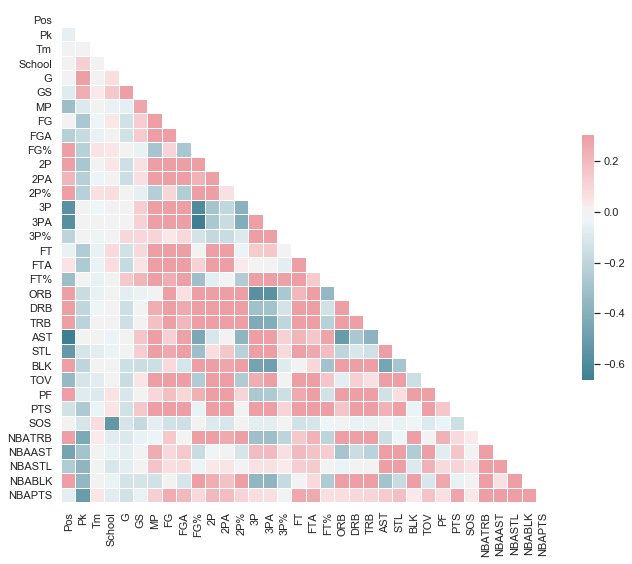

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

In [17]:
#Regular
df4 = df3[0:550]
#Rookie Class
df5 = df3[551:]
df5.head()

,Pos,Pk,Tm,School,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,4,1,35,2,33.0,33.0,30.0,9.0,13.2,0.680,...,1.8,2.4,2.1,22.6,11.97,0.0,0.0,0.0,0.0,0.0
RJ Barrett,1,3,27,2,38.0,38.0,35.3,8.4,18.5,0.454,...,0.4,3.2,1.8,22.6,11.97,0.0,0.0,0.0,0.0,0.0
Darius Garland,0,5,15,53,5.0,5.0,27.8,5.8,10.8,0.537,...,0.4,3.0,1.4,16.2,7.79,0.0,0.0,0.0,0.0,0.0
Coby White,0,6,22,6,35.0,35.0,28.5,5.4,12.7,0.423,...,0.3,2.7,1.9,16.1,11.35,0.0,0.0,0.0,0.0,0.0
Jarrett Culver,1,7,8,52,75.0,58.0,29.5,5.3,11.6,0.459,...,0.6,2.1,2.0,14.9,9.56,0.0,0.0,0.0,0.0,0.0


In [18]:
train=df4[0:(round(len(df4)*.8))] 
test=df4[(round(len(df4)*.8 - 1)):]
trains = np.split(train, [29], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [29], axis=1)
test_x=tests[0]
test_y=tests[1]

In [19]:
train_x.head()

,Pos,Pk,Tm,School,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
Name,,,,,,,,,,,,,,,,,,,,,
Gilbert Arenas,0.0,31.0,0.0,0.0,70.0,33.0,30.5,5.6,12.1,0.466,...,0.8,2.8,3.8,2.2,1.9,0.2,2.7,2.4,15.8,11.13
Brandon Armstrong,1.0,23.0,1.0,1.0,65.0,30.0,30.4,6.6,15.1,0.439,...,1.2,2.1,3.2,1.5,1.7,0.2,1.9,2.6,18.1,2.56
Shane Battier,2.0,6.0,2.0,2.0,146.0,39.0,31.4,4.5,8.9,0.500,...,2.4,4.9,6.1,1.6,1.8,1.7,1.2,1.6,13.6,10.08
Jamison Brewer,1.0,41.0,3.0,3.0,58.0,33.0,23.2,2.1,4.5,0.456,...,2.8,4.4,4.7,4.1,1.1,0.1,2.2,1.3,5.7,7.67
Damone Brown,2.0,37.0,4.0,4.0,113.0,34.0,29.2,4.3,8.7,0.497,...,3.2,5.6,6.0,1.1,1.0,0.8,1.6,2.4,10.9,6.91


### Linear Regression

In [20]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([-2.66285011e-01, -1.09839230e-01,  2.99006882e-02, -2.52271153e-03,
       -4.17783564e-03,  1.08488005e-03, -2.51575426e-01,  5.79330538e-01,
       -3.90314307e+00,  2.88878020e+00,  1.84460304e+00,  3.78668501e+00,
        2.97369041e+00,  3.24058146e+00,  3.83155678e+00,  4.76515936e-02,
        6.86850784e-01,  3.04353437e-01, -1.40014737e-01,  2.60183922e-01,
       -3.45725020e-02,  1.91630254e-01,  6.11316696e-01,  5.78101489e-01,
       -1.69208404e-01, -3.40711009e-01, -2.43322209e-02, -7.74355773e-01,
       -6.88082642e-03])

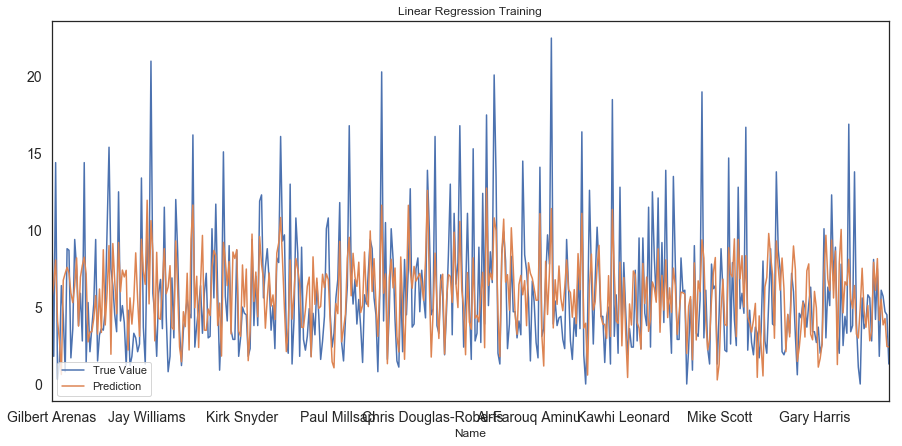

adj train r^2 = 0.3212459993154816
train mse = 10.187281008023444


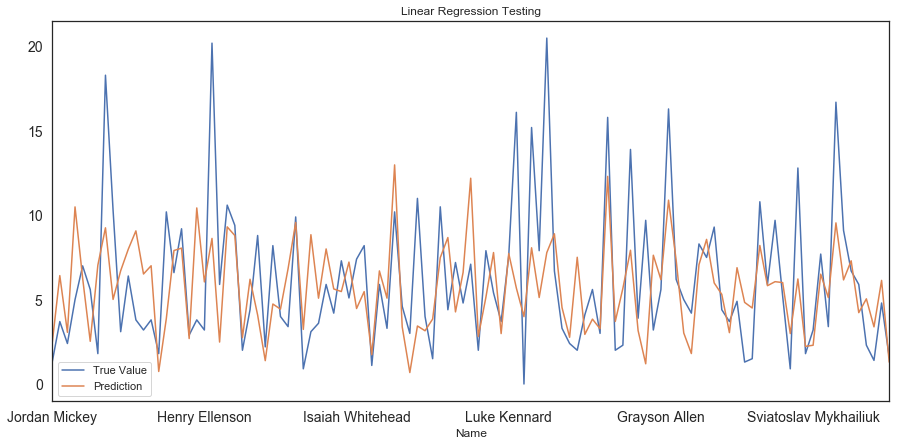

['Pos', 'Pk', 'Tm', 'School', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS']
adj test r^2 = 0.19070510076144376
test mse = 13.964245153812284


In [22]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = (reg.predict(train_x.values))
test_y2['prediction'] = (reg.predict(test_x.values))
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

### Extra ML

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

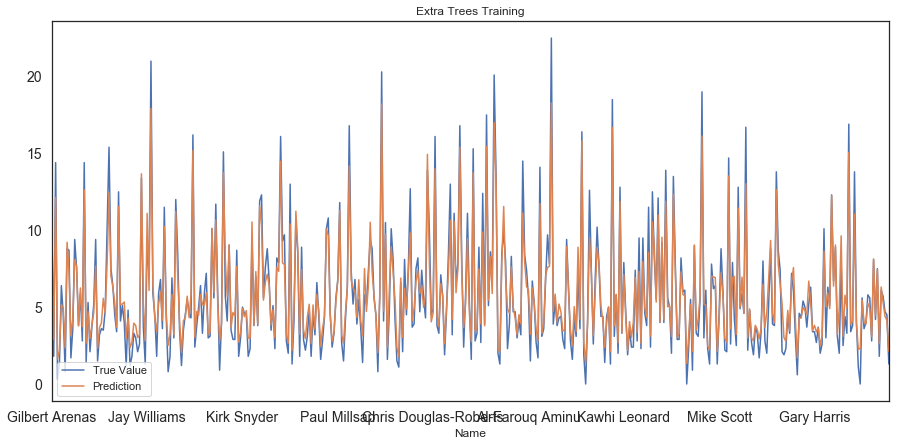

adj train r^2 = 0.9156071154038687
train mse = 1.2666356730000081


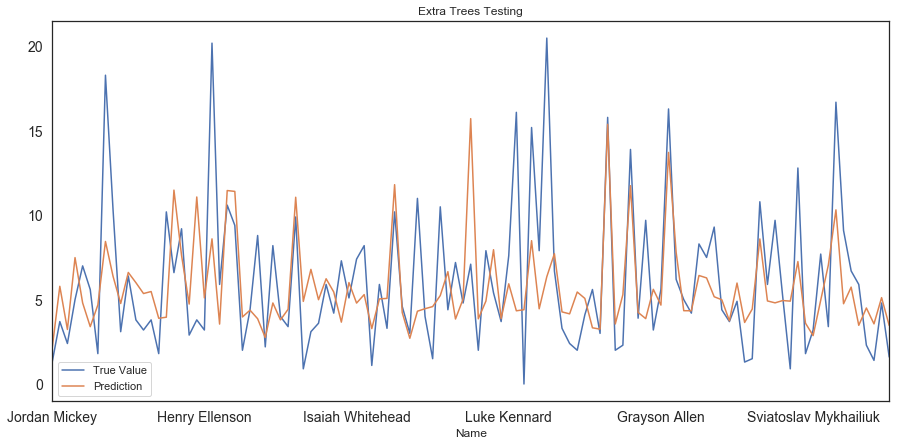

['Pos', 'Pk', 'Tm', 'School', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS']
adj test r^2 = 0.2348003099893906
test mse = 13.203389855765744


In [24]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = (reg.predict(train_x.values))
test_y2['prediction'] = (reg.predict(test_x.values))
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Random Forrest

In [25]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

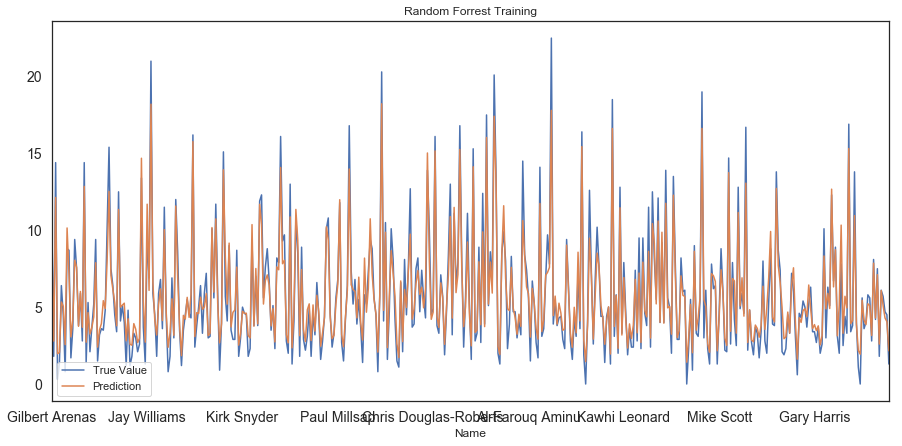

adj train r^2 = 0.9135001647326871
train mse = 1.2982584679090978


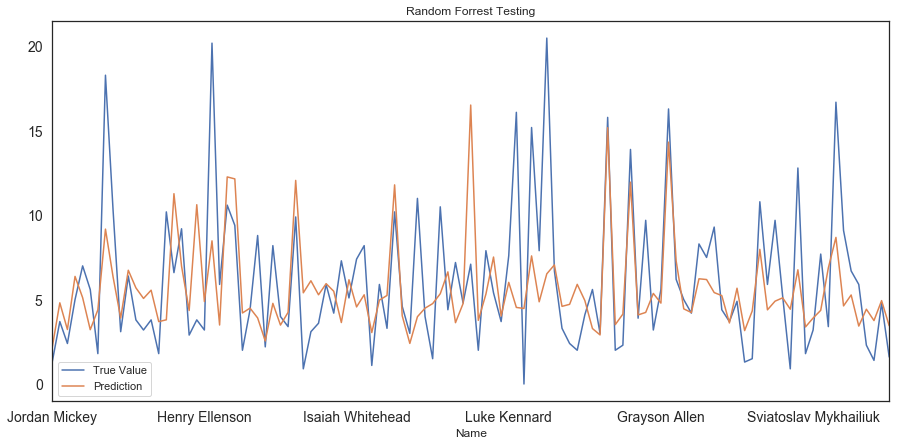

['Pos', 'Pk', 'Tm', 'School', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS']
adj test r^2 = 0.22596009642699277
test mse = 13.355926229729706


In [26]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = (reg.predict(train_x.values))
test_y2['prediction'] =(reg.predict(test_x.values))
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## XGBoost

In [27]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [28]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## Neural Networks

In [29]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [30]:
K.clear_session()
model = Sequential()
model.add(Dense(64, input_dim=29, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.NBAPTS.values.ravel(), validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500,verbose=1,shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 440 samples, validate on 111 samples
Epoch 1/500
440/440 [==============================] - 0s 692us/step - loss: 31.8586 - val_loss: 27.7380
Epoch 2/500
440/440 [==============================] - 0s 24us/step - loss: 20.4967 - val_loss: 20.1358
Epoch 3/500
440/440 [==============================] - 0s 20us/step - loss: 16.5348 - val_loss: 17.6651
Epoch 4/500
440/440 [==============================] - 0s 20us/step - loss: 15.4684 - val_loss: 16.7534
Epoch 5/500
440/440 [==============================] - 0s 20us/step - loss: 14.9688 - val_loss: 16.2905
Epoch 6/500
440/440 [==============================] - 0s 20us/step - loss: 14.6150 - val_loss: 15.9733
Epoch 7/500
440/440 [==============================] - 0s 20us/step - loss: 14.3181 - val_loss: 15.7062
Epoch 8/500
440/440 [==============================] - 0s 22us/step - loss: 14.0576 - val_loss: 15.4704
E

440/440 [==============================] - 0s 20us/step - loss: 6.9569 - val_loss: 13.2974
Epoch 74/500
440/440 [==============================] - 0s 19us/step - loss: 6.9262 - val_loss: 13.3092
Epoch 75/500
440/440 [==============================] - 0s 20us/step - loss: 6.8991 - val_loss: 13.3210
Epoch 76/500
440/440 [==============================] - 0s 20us/step - loss: 6.8689 - val_loss: 13.3335
Epoch 77/500
440/440 [==============================] - 0s 20us/step - loss: 6.8451 - val_loss: 13.3459
Epoch 78/500
440/440 [==============================] - 0s 20us/step - loss: 6.8155 - val_loss: 13.3587
Epoch 79/500
440/440 [==============================] - 0s 22us/step - loss: 6.7938 - val_loss: 13.3645
Epoch 80/500
440/440 [==============================] - 0s 22us/step - loss: 6.7631 - val_loss: 13.3785
Epoch 81/500
440/440 [==============================] - 0s 20us/step - loss: 6.7394 - val_loss: 13.3778
Epoch 82/500
440/440 [==============================] - 0s 23us/step - loss: 

440/440 [==============================] - 0s 20us/step - loss: 5.4712 - val_loss: 13.9919
Epoch 152/500
440/440 [==============================] - 0s 18us/step - loss: 5.4611 - val_loss: 13.9868
Epoch 153/500
440/440 [==============================] - 0s 20us/step - loss: 5.4473 - val_loss: 14.0156
Epoch 154/500
440/440 [==============================] - 0s 22us/step - loss: 5.4378 - val_loss: 14.0083
Epoch 155/500
440/440 [==============================] - 0s 23us/step - loss: 5.4251 - val_loss: 14.0340
Epoch 156/500
440/440 [==============================] - 0s 20us/step - loss: 5.4159 - val_loss: 14.0259
Epoch 157/500
440/440 [==============================] - 0s 20us/step - loss: 5.4038 - val_loss: 14.0472
Epoch 158/500
440/440 [==============================] - 0s 24us/step - loss: 5.3943 - val_loss: 14.0411
Epoch 159/500
440/440 [==============================] - 0s 20us/step - loss: 5.3820 - val_loss: 14.0551
Epoch 160/500
440/440 [==============================] - 0s 20us/step

440/440 [==============================] - 0s 22us/step - loss: 4.6726 - val_loss: 14.2770
Epoch 230/500
440/440 [==============================] - 0s 23us/step - loss: 4.6593 - val_loss: 14.3180
Epoch 231/500
440/440 [==============================] - 0s 20us/step - loss: 4.6510 - val_loss: 14.2910
Epoch 232/500
440/440 [==============================] - 0s 22us/step - loss: 4.6375 - val_loss: 14.3170
Epoch 233/500
440/440 [==============================] - 0s 23us/step - loss: 4.6319 - val_loss: 14.2942
Epoch 234/500
440/440 [==============================] - 0s 23us/step - loss: 4.6200 - val_loss: 14.3186
Epoch 235/500
440/440 [==============================] - 0s 23us/step - loss: 4.6146 - val_loss: 14.2974
Epoch 236/500
440/440 [==============================] - 0s 22us/step - loss: 4.6039 - val_loss: 14.3213
Epoch 237/500
440/440 [==============================] - 0s 22us/step - loss: 4.5986 - val_loss: 14.3018
Epoch 238/500
440/440 [==============================] - 0s 20us/step

Epoch 307/500
440/440 [==============================] - 0s 20us/step - loss: 4.1307 - val_loss: 14.3503
Epoch 308/500
440/440 [==============================] - 0s 22us/step - loss: 4.1221 - val_loss: 14.3734
Epoch 309/500
440/440 [==============================] - 0s 20us/step - loss: 4.1177 - val_loss: 14.3512
Epoch 310/500
440/440 [==============================] - 0s 19us/step - loss: 4.1099 - val_loss: 14.3760
Epoch 311/500
440/440 [==============================] - 0s 23us/step - loss: 4.1053 - val_loss: 14.3520
Epoch 312/500
440/440 [==============================] - 0s 20us/step - loss: 4.0979 - val_loss: 14.3776
Epoch 313/500
440/440 [==============================] - 0s 22us/step - loss: 4.0933 - val_loss: 14.3532
Epoch 314/500
440/440 [==============================] - 0s 20us/step - loss: 4.0861 - val_loss: 14.3785
Epoch 315/500
440/440 [==============================] - ETA: 0s - loss: 7.615 - 0s 22us/step - loss: 4.0815 - val_loss: 14.3547
Epoch 316/500
440/440 [========

440/440 [==============================] - 0s 26us/step - loss: 3.7427 - val_loss: 14.4301
Epoch 385/500
440/440 [==============================] - 0s 29us/step - loss: 3.7274 - val_loss: 14.4808
Epoch 386/500
440/440 [==============================] - 0s 23us/step - loss: 3.7367 - val_loss: 14.4421
Epoch 387/500
440/440 [==============================] - 0s 23us/step - loss: 3.7226 - val_loss: 14.4918
Epoch 388/500
440/440 [==============================] - 0s 22us/step - loss: 3.7352 - val_loss: 14.4650
Epoch 389/500
440/440 [==============================] - 0s 22us/step - loss: 3.7212 - val_loss: 14.5004
Epoch 390/500
440/440 [==============================] - 0s 20us/step - loss: 3.7280 - val_loss: 14.4767
Epoch 391/500
440/440 [==============================] - 0s 23us/step - loss: 3.7146 - val_loss: 14.4880
Epoch 392/500
440/440 [==============================] - 0s 22us/step - loss: 3.7238 - val_loss: 14.5503
Epoch 393/500
440/440 [==============================] - 0s 22us/step

440/440 [==============================] - 0s 22us/step - loss: 3.3569 - val_loss: 14.4840
Epoch 463/500
440/440 [==============================] - 0s 22us/step - loss: 3.3374 - val_loss: 14.5664
Epoch 464/500
440/440 [==============================] - 0s 22us/step - loss: 3.3482 - val_loss: 14.4861
Epoch 465/500
440/440 [==============================] - 0s 22us/step - loss: 3.3286 - val_loss: 14.5696
Epoch 466/500
440/440 [==============================] - 0s 22us/step - loss: 3.3394 - val_loss: 14.4882
Epoch 467/500
440/440 [==============================] - 0s 20us/step - loss: 3.3199 - val_loss: 14.5721
Epoch 468/500
440/440 [==============================] - 0s 22us/step - loss: 3.3304 - val_loss: 14.4905
Epoch 469/500
440/440 [==============================] - 0s 19us/step - loss: 3.3111 - val_loss: 14.5741
Epoch 470/500
440/440 [==============================] - 0s 23us/step - loss: 3.3211 - val_loss: 14.4930
Epoch 471/500
440/440 [==============================] - 0s 20us/step

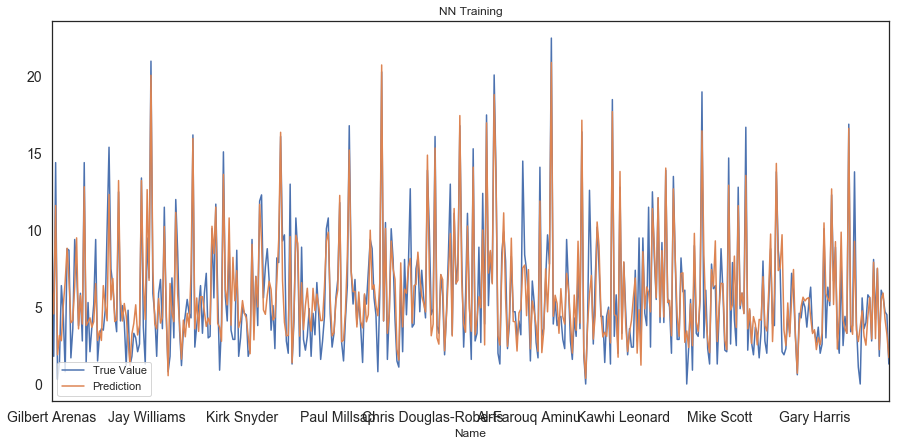

adj train r^2 = 0.7944022479252872
train mse = 3.085774924185734


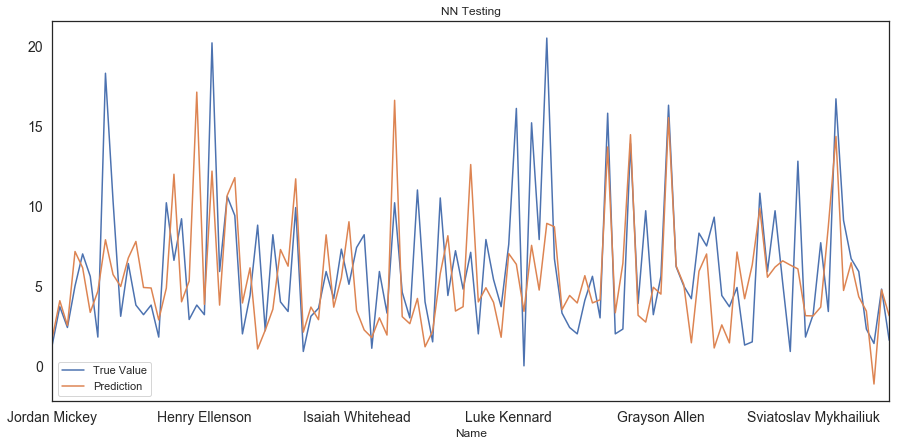

adj test r^2 = 0.1555631920433762
test mse = 14.570612781945986


In [31]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = (model.predict(train_x.values))
test_y2['prediction'] = (model.predict(test_x.values))
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## TPOT

In [32]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=5, max_time_mins=1, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())


1.0109799833333333 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: DecisionTreeRegressor(ZeroCount(ElasticNetCV(SelectPercentile(input_matrix, percentile=10), l1_ratio=0.7000000000000001, tol=0.001)), max_depth=3, min_samples_leaf=14, min_samples_split=6)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=1, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

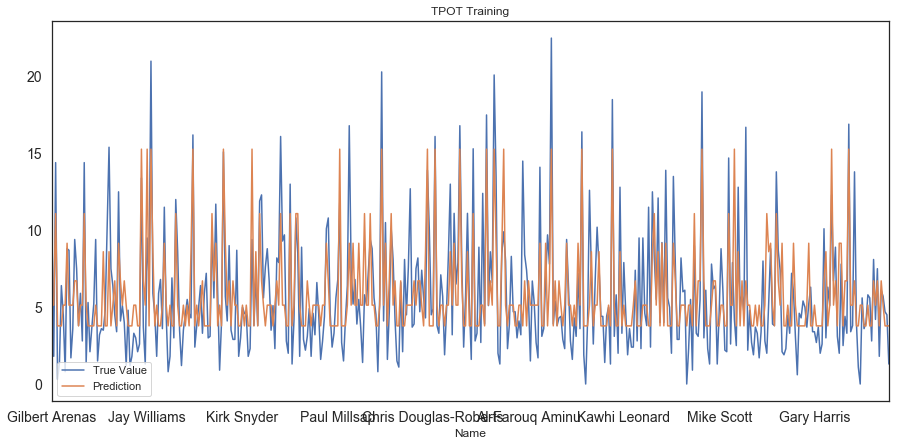

adj train r^2 = 0.47744295653244595
train mse = 7.842952585409807


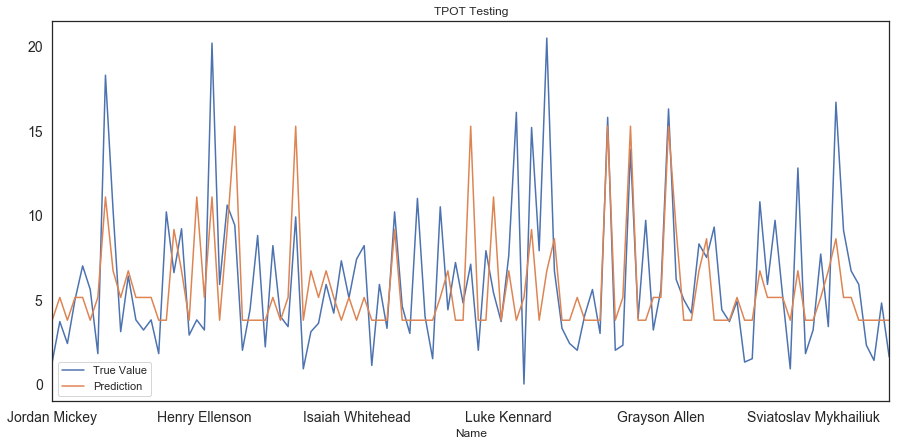

adj test r^2 = 0.23040761262803577
test mse = 13.2791850978934


In [33]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = (tpot.predict(train_x.values))
test_y2['prediction'] = (tpot.predict(test_x.values))
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Predictions

In [34]:
trains = np.split(df5, [29], axis=1)
train_x=trains[0]
train_y=trains[1]

In [35]:
train_y.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Zion Williamson,0.0,0.0,0.0,0.0,0.0
RJ Barrett,0.0,0.0,0.0,0.0,0.0
Darius Garland,0.0,0.0,0.0,0.0,0.0
Coby White,0.0,0.0,0.0,0.0,0.0
Jarrett Culver,0.0,0.0,0.0,0.0,0.0


In [38]:
train_y['NBAPTS']=tpot.predict(train_x.values)
train_y

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Zion Williamson,0.0,0.0,0.0,0.0,15.276190
RJ Barrett,0.0,0.0,0.0,0.0,15.276190
Darius Garland,0.0,0.0,0.0,0.0,9.156000
Coby White,0.0,0.0,0.0,0.0,9.156000
Jarrett Culver,0.0,0.0,0.0,0.0,9.156000
Bruno Fernando,0.0,0.0,0.0,0.0,6.708889
Mfiondu Kabengele,0.0,0.0,0.0,0.0,6.708889
Nassir Little,0.0,0.0,0.0,0.0,6.708889
Rui Hachimura,0.0,0.0,0.0,0.0,5.129710


In [46]:
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

display_charts(train_y, title="Plot with pandas-highcharts")